In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [5]:
# If your dataset is in the same folder as your script or notebook:

#df = pd.read_csv("letter-recognition.csv", names=column_names)


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['Letter'] + [f'Feature_{i}' for i in range(1, 17)]
df = pd.read_csv(url, names=column_names)

# Encode target labels (A-Z) as numerical values
label_encoder = LabelEncoder()
df['Letter'] = label_encoder.fit_transform(df['Letter'])

# Split data into features and labels
X = df.iloc[:, 1:].values  # Features (16 numerical values)
y = df.iloc[:, 0].values   # Target (letters A-Z encoded as numbers)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(16,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(26, activation='softmax')  # 26 output classes (A-Z)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\Harshada\anaconda31\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,370 (52.23 KB)

 Trainable params: 13,370 (52.23 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4021 - loss: 2.1397 - val_accuracy: 0.7847 - val_loss: 0.7490
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7934 - loss: 0.6921 - val_accuracy: 0.8378 - val_loss: 0.5439
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.5014 - val_accuracy: 0.8763 - val_loss: 0.4261
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8809 - loss: 0.4046 - val_accuracy: 0.8895 - val_loss: 0.3660
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8936 - loss: 0.3558 - val_accuracy: 0.8950 - val_loss: 0.3366
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9099 - loss: 0.2984 - val_accuracy: 0.9070 - val_loss: 0.3079
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9167 - loss: 0.2747 - val_accuracy: 0.9222 - val_loss: 0.2634
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9265 - loss: 0.2357 - val_accuracy: 0.

In [11]:
# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert numeric predictions back to letters
y_pred_letters = label_encoder.inverse_transform(y_pred)

# Convert test labels back to letters
y_test_letters = label_encoder.inverse_transform(y_test)

# Display some predictions
for i in range(5):
    print(f"Actual: {y_test_letters[i]}, Predicted: {y_pred_letters[i]}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Actual: T, Predicted: T
Actual: L, Predicted: L
Actual: A, Predicted: A
Actual: E, Predicted: E
Actual: Q, Predicted: Q


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision (Macro-averaged for multiclass)
precision = precision_score(y_test, y_pred, average='macro')

# Calculate Recall (Macro-averaged for multiclass)
recall = recall_score(y_test, y_pred, average='macro')

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.9510
Precision: 0.9510
Recall: 0.9511


In [15]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       149
           1       0.97      0.92      0.94       153
           2       0.98      0.90      0.94       137
           3       0.95      0.94      0.95       156
           4       0.91      0.95      0.93       141
           5       0.91      0.97      0.94       140
           6       0.98      0.90      0.94       160
           7       0.83      0.94      0.88       144
           8       0.96      0.92      0.94       146
           9       0.92      0.98      0.95       149
          10       0.88      0.92      0.89       130
          11       0.97      0.95      0.96       155
          12       0.99      0.99      0.99       168
          13       0.97      0.98      0.97       151
          14       0.97      0.96      0.96       145
          15       0.98      0.95      0.96       173
          16       0.99      0.95      0.97       166
   

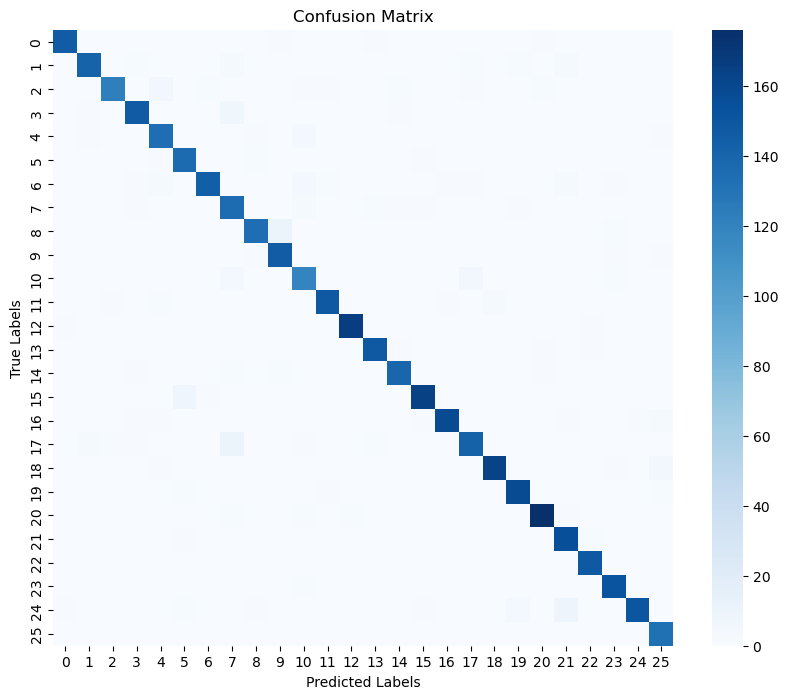

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
